# Exploring `build_shapes.py` outputs

### Jupyter notebook needs to be improves

In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show

# change current directory to parent folder
import os
import sys

if not os.path.isdir("pypsa-earth"):
    os.chdir("../..")
sys.path.append(os.getcwd()+"/pypsa-earth/scripts")

<AxesSubplot:>

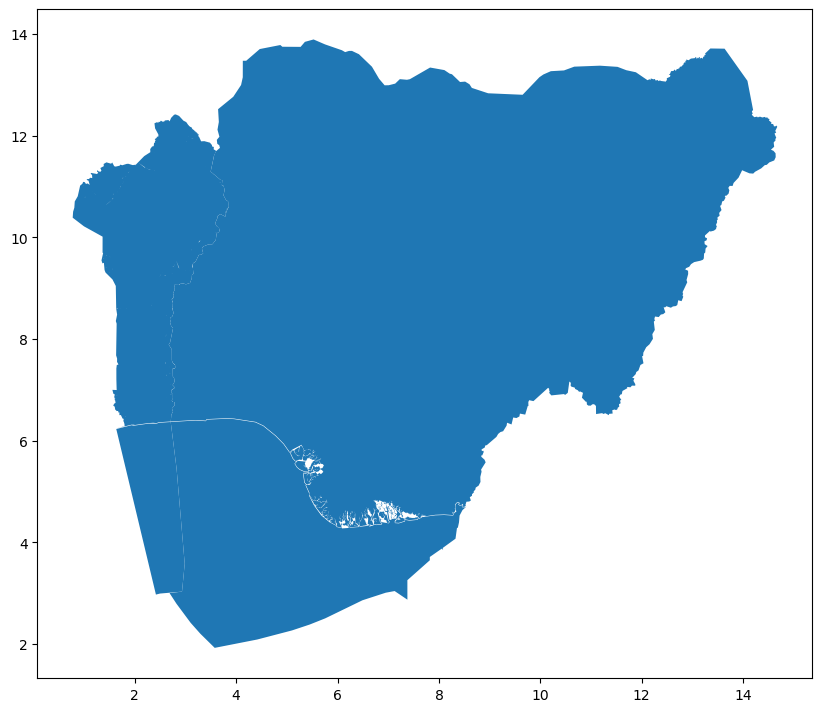

In [2]:
scenario_name = ""  # scenario name, default value is "" for tutorial or default configuration
                    # value shall be non null if a scenario name is specified under the "run" tag in the config file

scenario_subpath = scenario_name + "/" if scenario_name else ""

continent = gpd.read_file("pypsa-earth/resources/" + scenario_subpath + "shapes/country_shapes.geojson")
off_shore = gpd.read_file("pypsa-earth/resources/" + scenario_subpath + "shapes/offshore_shapes.geojson")
gadm = gpd.read_file("pypsa-earth/resources/" + scenario_subpath + "shapes/gadm_shapes.geojson")

ax = continent.plot(figsize=(10, 10))
off_shore.plot(ax=ax)

In [3]:
off_shore

,name,geometry
0,NG,"POLYGON ((8.54140 4.70052, 8.46444 4.63333, 8...."
1,BJ,"POLYGON ((2.82397 5.44567, 2.98419 3.57678, 2...."


<AxesSubplot:>

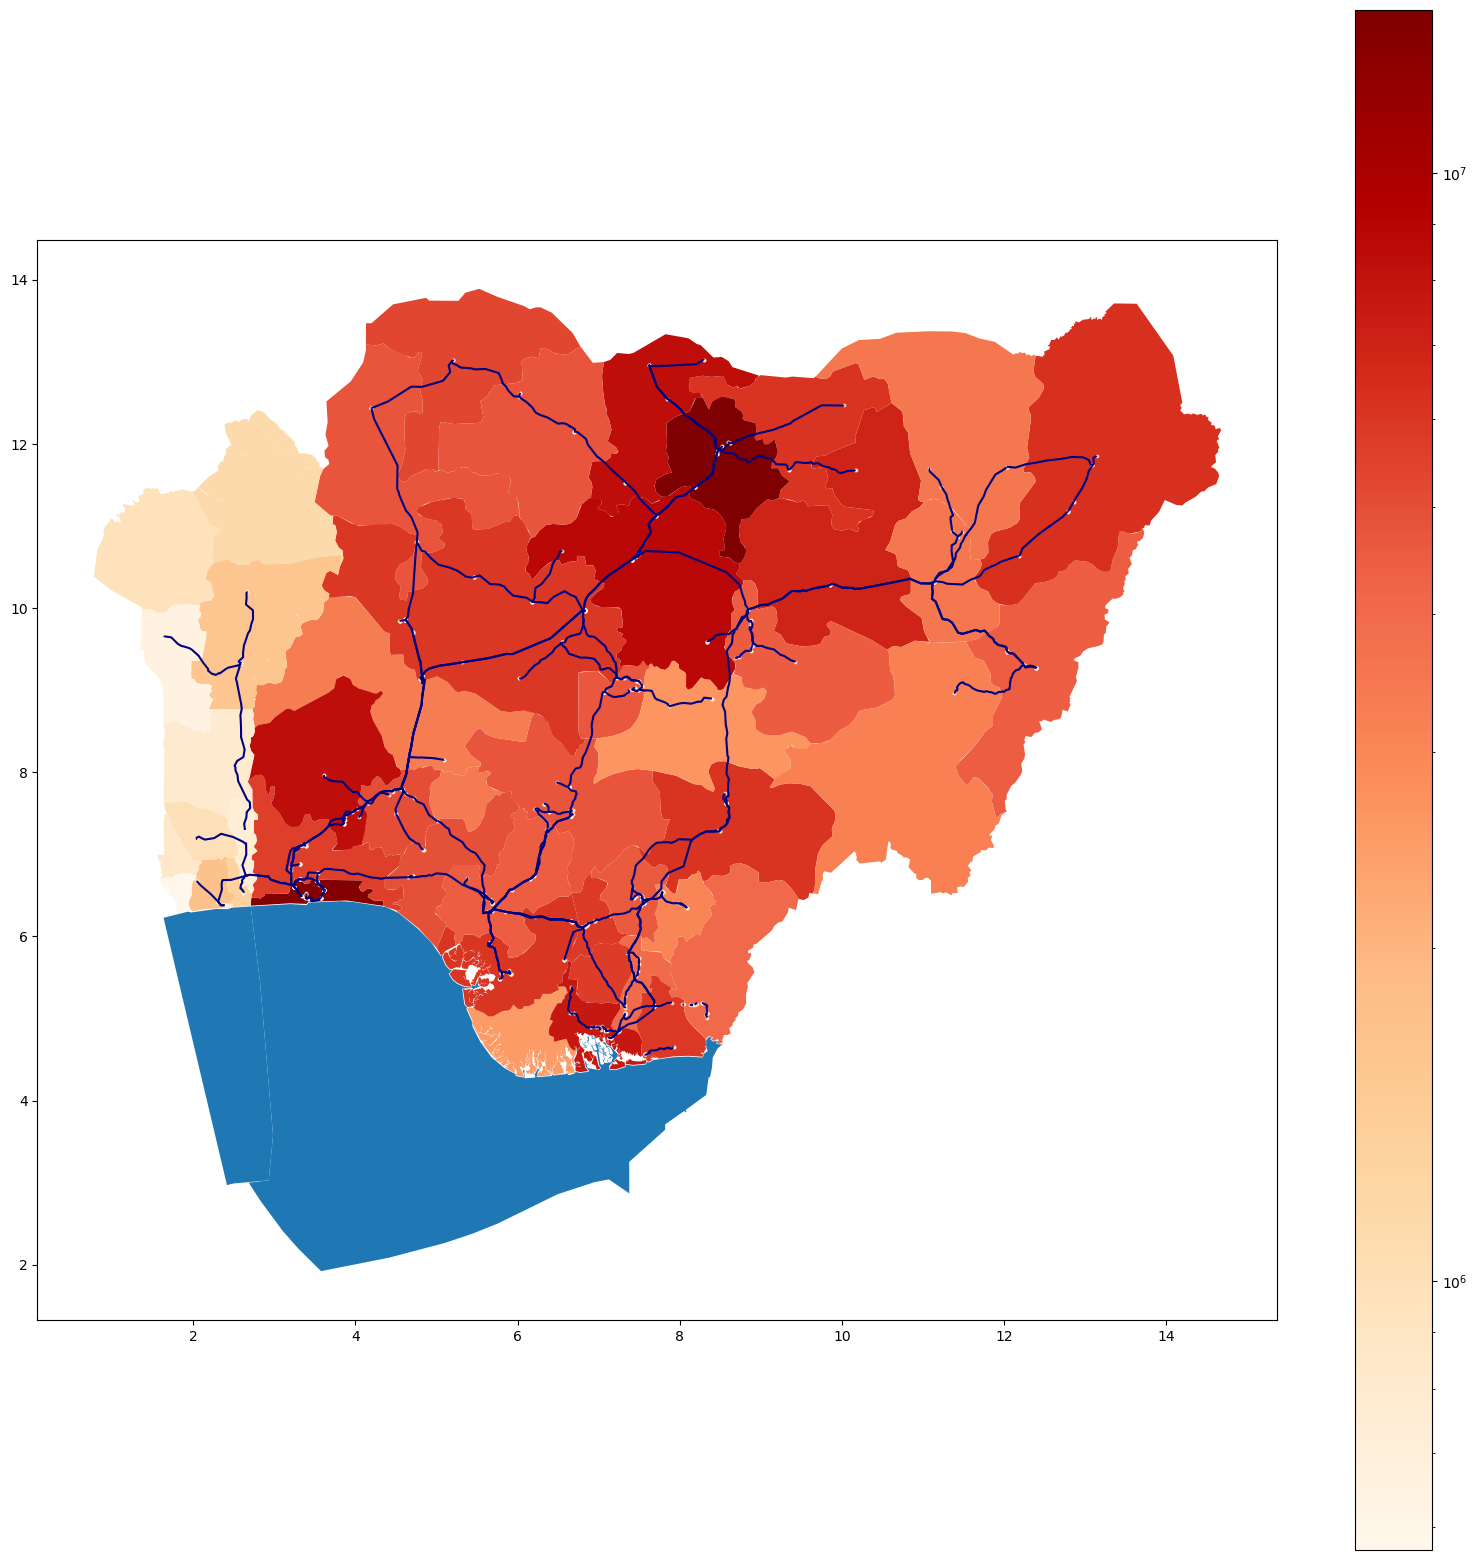

In [4]:
df_substations_osm_clean = gpd.read_file(
    os.getcwd() + "/pypsa-earth/resources/" + scenario_subpath + "osm/clean/all_clean_substations.geojson"
)
df_lines_osm_clean = gpd.read_file(
    os.getcwd() + "/pypsa-earth/resources/" + scenario_subpath + "osm/clean/all_clean_lines.geojson"
)


ax2 = gadm.plot(
    column="pop",
    cmap="OrRd",
    figsize=(20, 20),
    legend=True,
    norm=matplotlib.colors.LogNorm(vmin=gadm["pop"].min(), vmax=gadm["pop"].max()),
)  # column="pop",
off_shore.plot(ax=ax2, label="offshore")
df_lines_osm_clean.plot(ax=ax2, color="navy")
df_substations_osm_clean.plot(ax=ax2, color="papayawhip", alpha=0.7, markersize=3)


# plt.savefig("linkedin_post_small.png")

<AxesSubplot:>

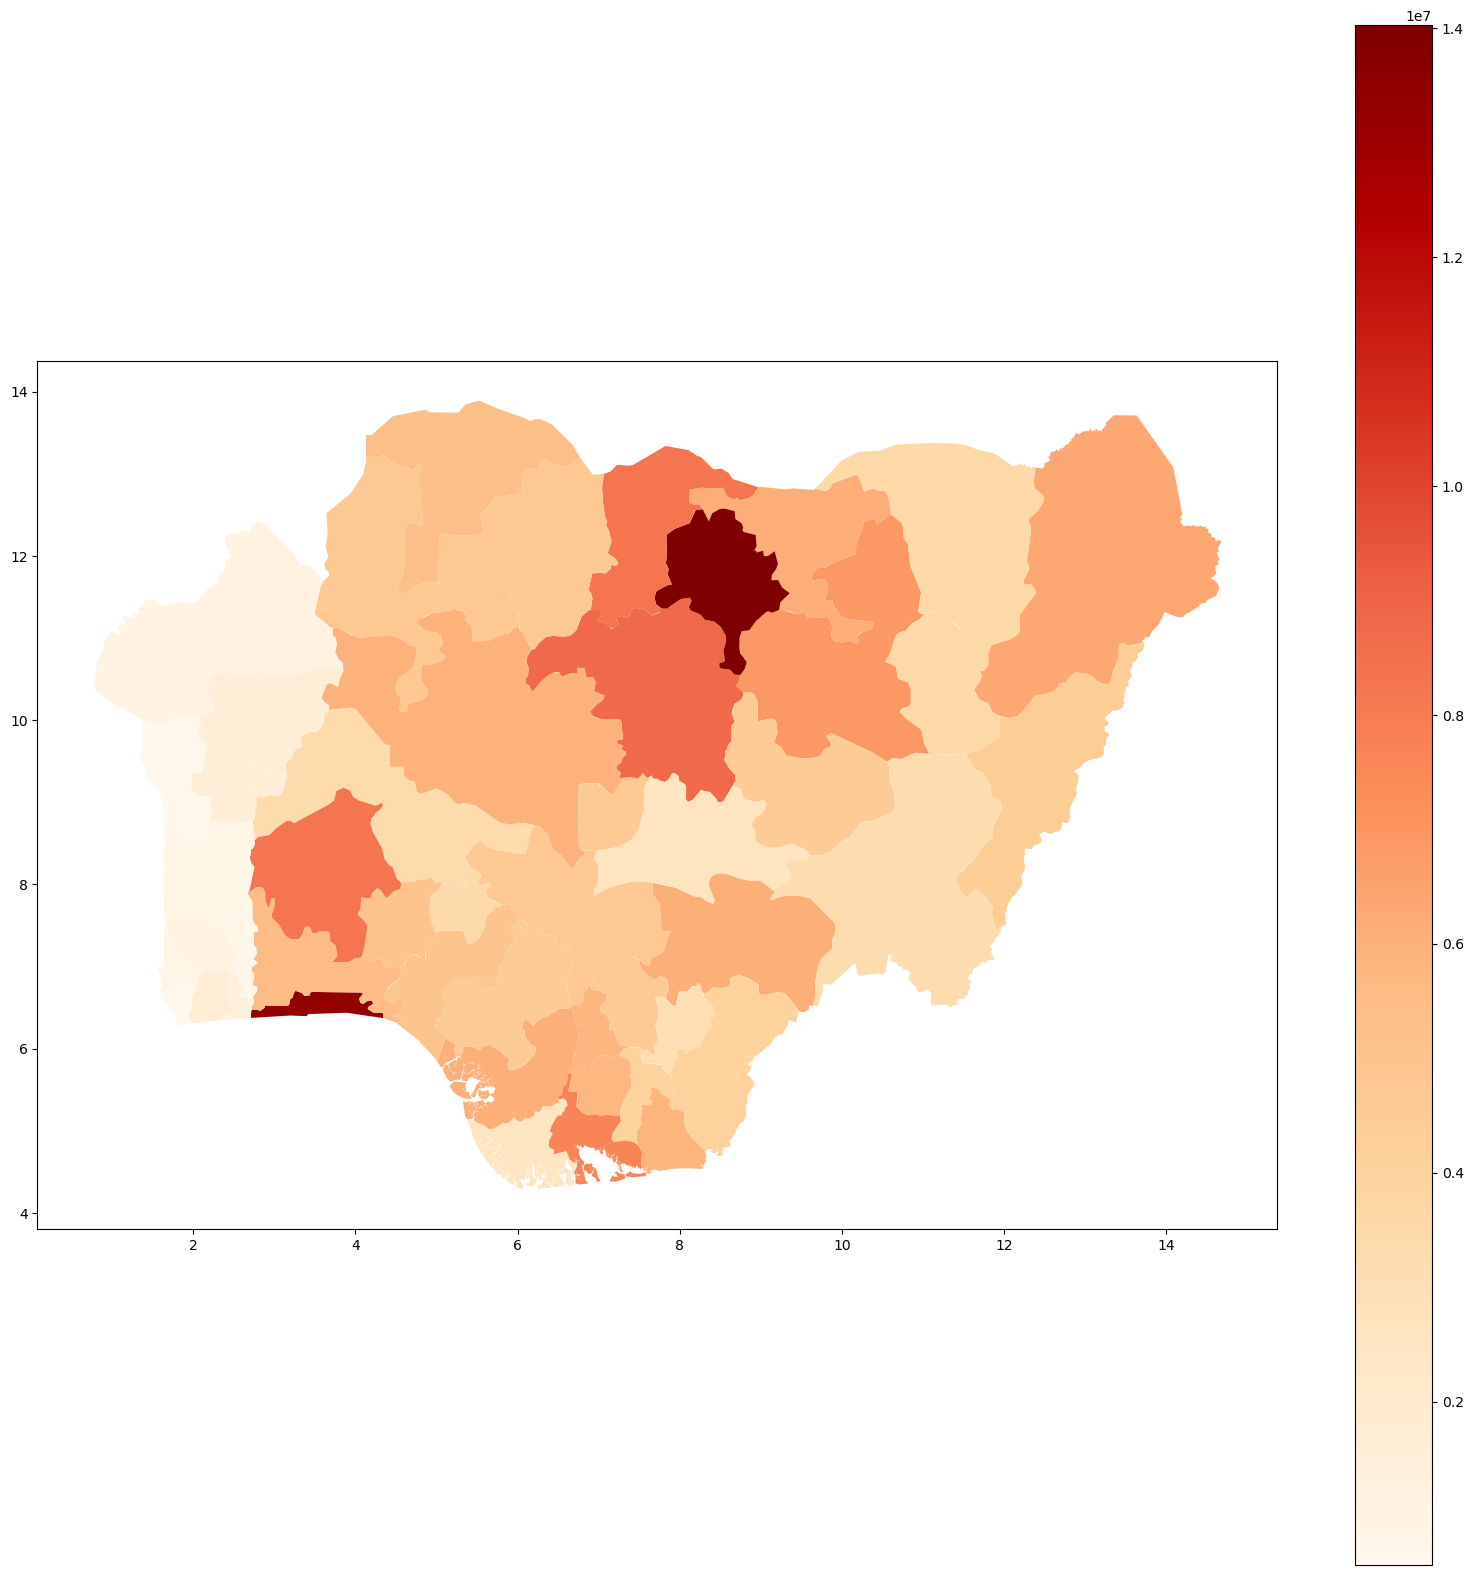

In [5]:
ax3 = gadm.plot(column="pop", cmap="OrRd", figsize=(20, 20), legend=True)
off_shore.plot(ax=ax2, label="offshore")
# plt.savefig("gadm_gdp.pdf")

<AxesSubplot:>

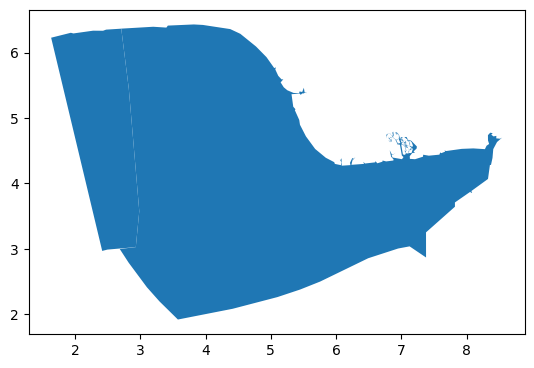

In [6]:
ret_df = off_shore.copy()
#off_shore.plot()

for c_code in ["NG"]:
    selection = ret_df.name == c_code
    n_offshore_shapes = selection.sum()

    if n_offshore_shapes > 1:
        # when multiple shapes per country, then merge polygons

        geom = ret_df[selection].geometry.unary_union
        print("TO DROP: ", ret_df[selection].index)
        ret_df.drop(ret_df[selection].index, inplace=True)
        ret_df.iloc[-1] = [c_code, geom]
ret_df.plot()